IC272 Assignment-1  
Harshit Anand  
B24128  
CSE

# Task 1: Data Preprocessing   
•Load and explore the Indian Districts Population dataset.  
•Handle missing values and clean anomalies (e.g., invalid percentages).  
•Create a target column by categorizing literacy as Low (< 65%), Medium (60–85%), or High (> 85%).  
•Encode categorical features, scale numeric variables, and split data into 70% training, 15% validation, and 15% test sets.  
•Provide visualizations before and after preprocessing.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("census2011.csv")

In [28]:
df.sample(10)

,Ranking,District,State,Population,Growth,Sex-Ratio,Literacy
95,96,Sitamarhi,Bihar,"3,423,574",27.62 %,899,52.05
433,464,Muktsar,Punjab,"901,896",16.00 %,896,65.81
276,307,Kaimur,Bihar,"1,626,384",26.17 %,920,69.34
428,459,Baksa,Assam,"950,075",10.74 %,974,69.25
452,483,Shimla,Himachal Pradesh,"814,010",12.67 %,915,83.64
269,300,Sangrur,Punjab,"1,655,169",12.35 %,885,67.99
554,585,Bishnupur,Manipur,"237,399",13.93 %,999,75.85
165,196,Kheda,Gujarat,"2,299,885",13.62 %,940,82.65
325,356,Auraiya,Uttar Pradesh,"1,379,545",16.91 %,864,78.95
473,504,Sheopur,Madhya Pradesh,"687,861",22.94 %,901,57.43


In [29]:
# Checking column names and data types
print("Column names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nDataset shape:")
print(df.shape)

Column names:
['Ranking', 'District', 'State', 'Population', 'Growth', 'Sex-Ratio', 'Literacy']

Data types:
Ranking         int64
District       object
State          object
Population     object
Growth         object
Sex-Ratio       int64
Literacy      float64
dtype: object

Dataset shape:
(610, 7)


In [30]:
df.shape

(610, 7)

In [31]:
df.describe()

,Ranking,Sex-Ratio,Literacy
count,610.000000,610.000000,610.000000
mean,329.598361,944.914754,72.344344
std,184.656903,61.247694,10.540881
min,1.000000,534.000000,36.100000
25%,183.250000,905.000000,65.255000
50%,335.500000,948.000000,72.150000
75%,487.750000,982.000000,79.987500
max,640.000000,1184.000000,97.910000


In [32]:
df.info

<bound method DataFrame.info of      Ranking                    District                        State  \
0          1                       Thane                  Maharashtra   
1          2  North Twenty Four Parganas                  West Bengal   
2          3                   Bangalore                    Karnataka   
3          4                        Pune                  Maharashtra   
4          5             Mumbai Suburban                  Maharashtra   
..       ...                         ...                          ...   
605      636                    Nicobars  Andaman and Nicobar Islands   
606      637                 Upper Siang            Arunachal Pradesh   
607      638             Lahul and Spiti             Himachal Pradesh   
608      639                       Anjaw            Arunachal Pradesh   
609      640               Dibang Valley            Arunachal Pradesh   

     Population    Growth  Sex-Ratio  Literacy  
0    11,060,148   36.01 %        886     8

In [33]:
df.duplicated().sum()
df['District'].duplicated().sum()

np.int64(6)

In [34]:
# Remove duplicate rows based on District column from the entire dataframe
df.drop_duplicates(subset=['District'], keep='first', inplace=True)

In [35]:
# Check duplicated districts after removal
print(f"Duplicated districts after removal: {df['District'].duplicated().sum()}")

Duplicated districts after removal: 0


In [36]:
df.shape

(604, 7)

# Data Cleaning and Anomaly Detection

In [37]:
# Clean and convert data types
# Population column - remove commas and convert to numeric
df['Population'] = pd.to_numeric(df['Population'].str.replace(",", ""), errors='coerce')

# Growth column - remove % sign and convert to numeric
df['Growth'] = pd.to_numeric(df['Growth'].str.replace("%", ""), errors='coerce')

# Check for any null values created during conversion
print("NaN values after conversion:")
print(df.isnull().sum())

# Check the range of values to identify anomalies
print(f"\nLiteracy rate range: {df['Literacy'].min():.2f}% to {df['Literacy'].max():.2f}%")
print(f"Growth rate range: {df['Growth'].min():.2f}% to {df['Growth'].max():.2f}%")
print(f"Sex-Ratio range: {df['Sex-Ratio'].min()} to {df['Sex-Ratio'].max()}")

# Check for invalid literacy rates (should be between 0-100)
invalid_literacy = df[(df['Literacy'] < 0) | (df['Literacy'] > 100)]
print(f"\nInvalid literacy rates: {len(invalid_literacy)} records")

NaN values after conversion:
Ranking       0
District      0
State         0
Population    0
Growth        0
Sex-Ratio     0
Literacy      0
dtype: int64

Literacy rate range: 36.10% to 97.91%
Growth rate range: -21.57% to 131.81%
Sex-Ratio range: 534 to 1184

Invalid literacy rates: 0 records


In [38]:
# lets see the avg literacy rate for all states with highest on the top

df1 = df.groupby(['State'])[['Literacy']].mean().round(2).reset_index().rename(columns={'Literacy':'Literacy_avg'})

df1.sort_values(by='Literacy_avg', ascending=False, inplace=True)

df1.reset_index(drop=True)

,State,Literacy_avg
0,Kerala,94.03
1,Lakshadweep,91.85
2,Mizoram,89.36
3,Goa,88.58
4,Puducherry,87.46
5,Tripura,86.64
6,Delhi,86.56
7,Chandigarh,86.05
8,Daman and Diu,85.76
9,Andaman and Nicobar Islands,83.70


In [39]:
# top 5 states based on literacy rates

df1['State'].head(5)

17         Kerala
18    Lakshadweep
23        Mizoram
10            Goa
26     Puducherry
Name: State, dtype: object

In [40]:
# last 5 states based on literacy rates

df1['State'].tail(5)

14    Jammu and Kashmir
28            Rajasthan
2     Arunachal Pradesh
15            Jharkhand
4                 Bihar
Name: State, dtype: object

In [41]:
# total population of all states

df2 = df.groupby(['State'])[['Population']].sum().rename(columns={'Population':'Total Population in MM'}).reset_index()

df2['Total Population in MM']= (df2["Total Population in MM"]/1000000).round(2)

df2.sort_values(by='Total Population in MM', ascending=False, inplace=True)

df2.reset_index(drop=True, inplace=True)

df2

,State,Total Population in MM
0,Uttar Pradesh,194.12
1,Maharashtra,100.89
2,Bihar,87.21
3,West Bengal,82.52
4,Madhya Pradesh,72.63
5,Tamil Nadu,69.42
6,Rajasthan,67.68
7,Andhra Pradesh,67.46
8,Karnataka,55.42
9,Gujarat,54.82


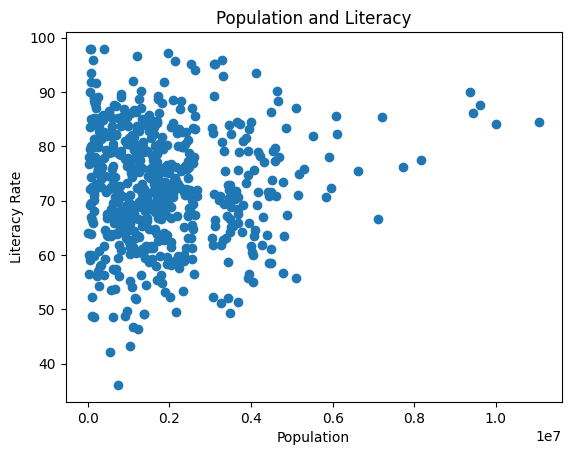

In [42]:
plt.scatter(df['Population'],df['Literacy'])

plt.title('Population and Literacy')
plt.xlabel('Population')
plt.ylabel('Literacy Rate')

plt.show()

# Target Column Creation

Create target column by categorizing literacy as:
- Low: < 65%
- Medium: 65-85%  
- High: > 85%

In [43]:
def lit_Cat(lit_rate):
    if lit_rate < 65:
        return 'Low'
    elif lit_rate <= 85:
        return 'Medium'
    else:
        return 'High'

df['Literacy_Category'] = df['Literacy'].apply(lit_Cat)

print("Literacy Category Distribution:")
print(df['Literacy_Category'].value_counts())
print(f"\nPercentages:")
print(df['Literacy_Category'].value_counts(normalize=True) * 100)

Literacy Category Distribution:
Literacy_Category
Medium    391
Low       146
High       67
Name: count, dtype: int64

Percentages:
Literacy_Category
Medium    64.735099
Low       24.172185
High      11.092715
Name: proportion, dtype: float64


# Visualizations Before Preprocessing

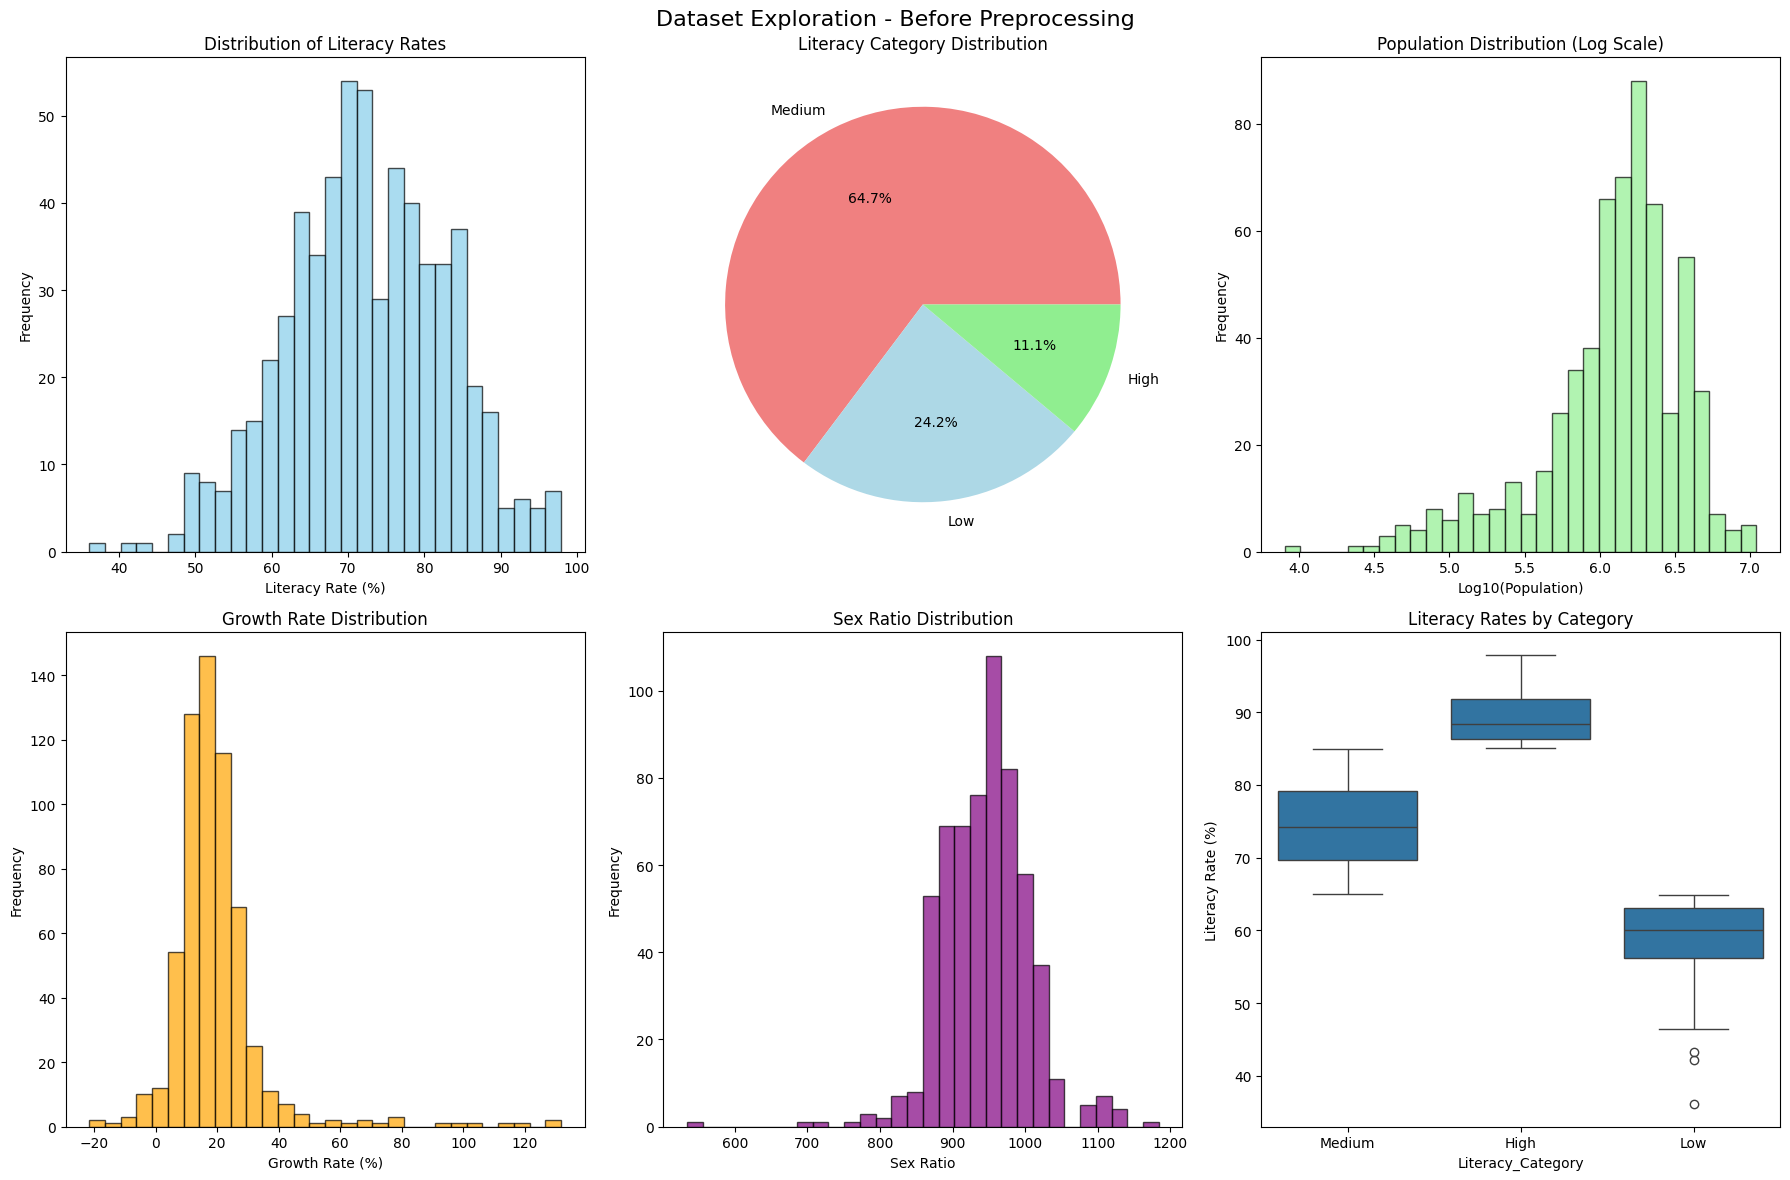

In [44]:
plt.style.use('default')

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Dataset Exploration - Before Preprocessing', fontsize=16)

# 1. Distribution of Literacy Rates
axes[0, 0].hist(df['Literacy'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Literacy Rates')
axes[0, 0].set_xlabel('Literacy Rate (%)')
axes[0, 0].set_ylabel('Frequency')

# 2. Literacy Category Distribution
category_counts = df['Literacy_Category'].value_counts()
axes[0, 1].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen'])
axes[0, 1].set_title('Literacy Category Distribution')

# 3. Population Distribution (log scale)
axes[0, 2].hist(np.log10(df['Population']), bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Population Distribution (Log Scale)')
axes[0, 2].set_xlabel('Log10(Population)')
axes[0, 2].set_ylabel('Frequency')

# 4. Growth Rate Distribution
axes[1, 0].hist(df['Growth'], bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[1, 0].set_title('Growth Rate Distribution')
axes[1, 0].set_xlabel('Growth Rate (%)')
axes[1, 0].set_ylabel('Frequency')

# 5. Sex Ratio Distribution
axes[1, 1].hist(df['Sex-Ratio'], bins=30, alpha=0.7, color='purple', edgecolor='black')
axes[1, 1].set_title('Sex Ratio Distribution')
axes[1, 1].set_xlabel('Sex Ratio')
axes[1, 1].set_ylabel('Frequency')

# 6. Literacy by Category - Box plot
sns.boxplot(data=df, x='Literacy_Category', y='Literacy', ax=axes[1, 2])
axes[1, 2].set_title('Literacy Rates by Category')
axes[1, 2].set_ylabel('Literacy Rate (%)')

plt.tight_layout()
plt.show()

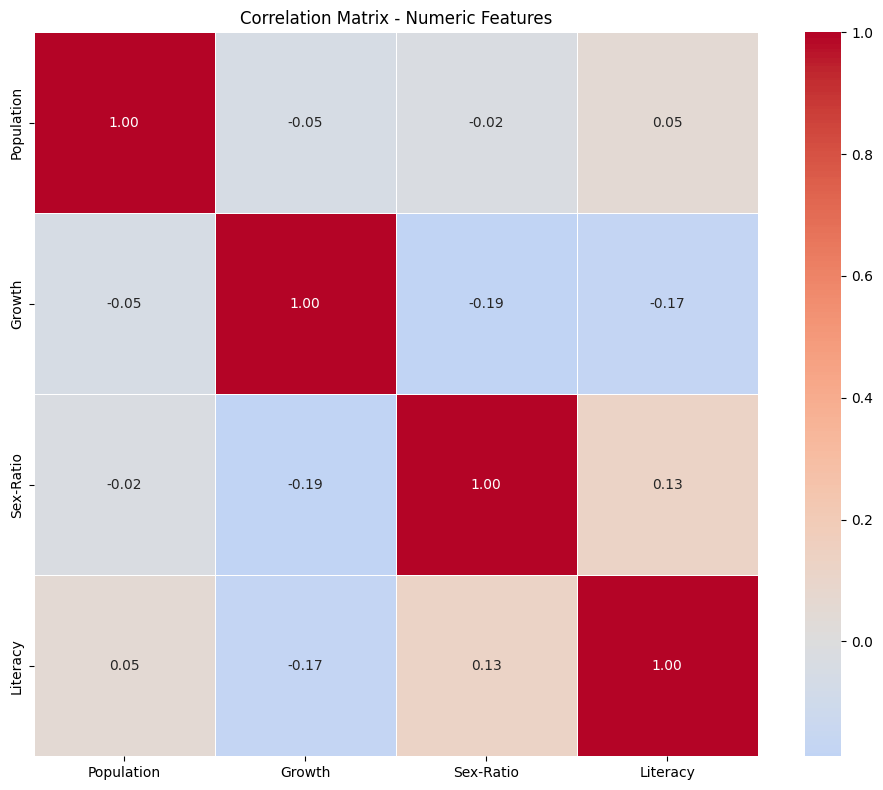

In [45]:
# Correlation matrix for numeric features
plt.figure(figsize=(10, 8))
numeric_features = ['Population', 'Growth', 'Sex-Ratio', 'Literacy']
correlation_matrix = df[numeric_features].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix - Numeric Features')
plt.tight_layout()
plt.show()

# Data Preprocessing 

In [46]:
#grouping states to reduce dimentionality
def create_state_groups(df):
    state_groups = {
        'North': ['Jammu and Kashmir', 'Himachal Pradesh', 'Punjab', 'Haryana', 'Delhi', 'Rajasthan', 'Uttar Pradesh', 'Uttarakhand'],
        
        'South': ['Andhra Pradesh', 'Karnataka', 'Kerala', 'Tamil Nadu'],
        
        'East': ['West Bengal', 'Orissa', 'Bihar', 'Jharkhand', 'Sikkim'],
        
        'West': ['Maharashtra', 'Gujarat', 'Goa', 'Madhya Pradesh', 'Chhattisgarh'],
        
        'Central': ['Madhya Pradesh', 'Chhattisgarh'],
        
        'Northeast': ['Assam', 'Arunachal Pradesh', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura'],
        
        'UT': ['Andaman and Nicobar Islands', 'Chandigarh', 'Dadra and Nagar Haveli','Daman and Diu', 'Lakshadweep', 'Puducherry']
    }
    
    # Create reverse mapping
    state_to_group = {}
    for group, states in state_groups.items():
        for state in states:
            state_to_group[state] = group
    
    # Apply grouping
    df['State_Group'] = df['State'].map(state_to_group)
        
    return df

df = create_state_groups(df)

In [47]:
df.sample(10)

,Ranking,District,State,Population,Growth,Sex-Ratio,Literacy,Literacy_Category,State_Group
551,582,Mon,Nagaland,250260,80.36,899,56.99,Low,Northeast
158,189,Bhopal,Madhya Pradesh,2371061,28.62,918,80.37,Medium,Central
9,10,Jaipur,Rajasthan,6626178,26.19,910,75.51,Medium,North
472,503,North Tripura,Tripura,693947,17.44,967,87.50,High,Northeast
384,415,Bundi,Rajasthan,1110906,15.40,925,61.52,Low,North
527,558,Aizawl,Mizoram,400309,22.92,1009,97.89,High,Northeast
126,157,Cuddalore,Tamil Nadu,2605914,14.02,987,78.04,Medium,South
354,385,Theni,Tamil Nadu,1245899,13.89,991,77.26,Medium,South
1,2,North Twenty Four Parganas,West Bengal,10009781,12.04,955,84.06,Medium,East
229,260,Jalor,Rajasthan,1828730,26.21,952,54.86,Low,North


In [48]:
df.isnull().sum()

Ranking              0
District             0
State                0
Population           0
Growth               0
Sex-Ratio            0
Literacy             0
Literacy_Category    0
State_Group          0
dtype: int64

In [49]:
# dropping the districts as they are too many and contained in the states and dropping the states and literacy column as I already made their category
df.drop(columns=['District', 'State','Literacy'],inplace=True)

In [50]:
df.sample(10)

,Ranking,Population,Growth,Sex-Ratio,Literacy_Category,State_Group
222,253,1870374,11.60,1019,High,South
31,32,4581268,9.92,862,Medium,North
249,280,1726601,15.61,986,Medium,South
572,603,142004,-20.72,822,High,North
280,311,1615069,-4.82,1122,Medium,West
306,337,1492073,28.03,925,Low,East
362,393,1214205,16.57,877,Medium,North
227,258,1840221,22.76,910,Low,North
217,248,1890422,30.63,880,Medium,North
540,571,312520,14.01,975,Medium,East


In [51]:
def tvt_split(X, y, train_size=0.7, val_size=0.15, test_size=0.15, random_state=42):
    np.random.seed(random_state)
    
    # Get total number of samples
    n_samples = len(X)

    # Calculate split indices
    train_end = int(n_samples * train_size)
    val_end = train_end + int(n_samples * val_size)

    # Create random indices
    indices = np.random.permutation(n_samples)

    # Split indices
    train_idx = indices[:train_end]
    val_idx = indices[train_end:val_end]
    test_idx = indices[val_end:]

    # Split data
    X_train = X.iloc[train_idx]
    X_val = X.iloc[val_idx]
    X_test = X.iloc[test_idx]

    y_train = y.iloc[train_idx]
    y_val = y.iloc[val_idx]
    y_test = y.iloc[test_idx]

    return X_train, X_val, X_test, y_train, y_val, y_test

def scaler(X_train, X_val, X_test, columns=None):
    X_train_scaled = X_train.copy()
    
    if columns is None:
        columns = X_train.select_dtypes(include=[np.number]).columns

    # Calculate mean and std from training data
    means = {}
    stds = {}

    for col in columns:
        means[col] = X_train[col].mean()
        stds[col] = X_train[col].std()

        # Scale training data
        X_train_scaled[col] = (X_train[col] - means[col]) / stds[col]

    results = [X_train_scaled]
    
    # Scale validation data 
    X_val_scaled = X_val.copy()
    for col in columns:
        X_val_scaled[col] = (X_val[col] - means[col]) / stds[col]
    results.append(X_val_scaled)
    
    # Scale test data 
    X_test_scaled = X_test.copy()
    for col in columns:
        X_test_scaled[col] = (X_test[col] - means[col]) / stds[col]
    results.append(X_test_scaled)
    
    return results if len(results) > 1 else results[0]

def label_encoder(y_train, y_val=None, y_test=None):
    # encode categorical labels to numbers
    # Get unique classes from training data
    unique_classes = sorted(y_train.unique())
    class_to_num = {cls: i for i, cls in enumerate(unique_classes)}
    
    # Encode training labels
    y_train_encoded = y_train.map(class_to_num)
    
    results = [y_train_encoded]
    
    # Encode validation labels if provided
    y_val_encoded = y_val.map(class_to_num)
    results.append(y_val_encoded)
    
    # Encode test labels if provided
    y_test_encoded = y_test.map(class_to_num)
    results.append(y_test_encoded)
    
    return results if len(results) > 1 else results[0], class_to_num

def one_hot_encoder(X_train, X_val=None, X_test=None, columns=None):
    # create one-hot encoding for categorical variables
    if columns is None:
        columns = X_train.select_dtypes(include=['object']).columns
    
    X_train_encoded = X_train.copy()

    # Store unique values for each categorical column
    categorical_mappings = {}
    
    for col in columns:
        # Get unique values from training data
        unique_values = sorted(X_train[col].unique())
        categorical_mappings[col] = unique_values
        
        # Create one-hot encoded columns (drop first to avoid multicollinearity)
        for i, value in enumerate(unique_values[1:], 1):  # Skip first category
            new_col_name = f"{col}_{value}"
            X_train_encoded[new_col_name] = (X_train[col] == value).astype(int)
        
        # Drop original column
        X_train_encoded = X_train_encoded.drop(col, axis=1)
    
    results = [X_train_encoded]
    
    # Encode validation data 
    X_val_encoded = X_val.copy()
    for col in columns:
        unique_values = categorical_mappings[col]
        for i, value in enumerate(unique_values[1:], 1):
            new_col_name = f"{col}_{value}"
            # Handle unseen categories by setting to 0
            X_val_encoded[new_col_name] = (X_val[col] == value).astype(int)
        X_val_encoded = X_val_encoded.drop(col, axis=1)
    results.append(X_val_encoded)
    
    # Encode test data
    X_test_encoded = X_test.copy()
    for col in columns:
        unique_values = categorical_mappings[col]
        for i, value in enumerate(unique_values[1:], 1):
            new_col_name = f"{col}_{value}"
# Handle unseen categories by setting to 0
            X_test_encoded[new_col_name] = (X_test[col] == value).astype(int)
        X_test_encoded = X_test_encoded.drop(col, axis=1)
    results.append(X_test_encoded)
    
    return results if len(results) > 1 else results[0], categorical_mappings

In [52]:
# After dropping District, State, Literacy - update your feature selection
feature_columns = ['State_Group', 'Population', 'Growth', 'Sex-Ratio']  # Use State_Group
X = df[feature_columns]
y = df['Literacy_Category']

# Split the data into train, validation, and test sets (70%, 15%, 15%)
X_train, X_val, X_test, y_train, y_val, y_test = tvt_split(X, y, train_size=0.7, val_size=0.15, test_size=0.15, random_state=42)

print(f"\nData split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples") 
print(f"Test set: {X_test.shape[0]} samples")


Data split:
Training set: 422 samples
Validation set: 90 samples
Test set: 92 samples


In [53]:
# encoding
categorical_cols = ['State_Group']  # Only State_Group needs one-hot encoding
numerical_cols = ['Population', 'Growth', 'Sex-Ratio']

print("Encoding State_Group with one-hot encoding...")
results, categorical_mappings = one_hot_encoder(X_train, X_val, X_test, columns=categorical_cols)

X_train_encoded, X_val_encoded, X_test_encoded = results

print(f"After one-hot encoding State_Group:")
print(f"Training set shape: {X_train_encoded.shape}")
print(f"Unique State_Groups: {X_train['State_Group'].unique()}")
print(f"One-hot columns created: {[col for col in X_train_encoded.columns if 'State_Group_' in col]}")
print(f"Validation set shape: {X_val_encoded.shape}")
print(f"Test set shape: {X_test_encoded.shape}")

Encoding State_Group with one-hot encoding...
After one-hot encoding State_Group:
Training set shape: (422, 9)
Unique State_Groups: ['West' 'East' 'Northeast' 'North' 'South' 'UT' 'Central']
One-hot columns created: ['State_Group_East', 'State_Group_North', 'State_Group_Northeast', 'State_Group_South', 'State_Group_UT', 'State_Group_West']
Validation set shape: (90, 9)
Test set shape: (92, 9)


In [54]:
# Scale numerical features
print("\nScaling numerical features...")
scale_results = scaler(X_train_encoded, X_val_encoded, X_test_encoded, columns=numerical_cols)

X_train_final, X_val_final, X_test_final = scale_results

print(f"Final processed shapes:")
print(f"Training set: {X_train_final.shape}")

# Encode target variables
print("\nEncoding target variables...")
target_results, class_mapping = label_encoder(y_train, y_val, y_test)

y_train_encoded, y_val_encoded, y_test_encoded = target_results

print("Class mapping:", class_mapping)
print(f"Training target shape: {y_train_encoded.shape}")
print(f"Validation target shape: {y_val_encoded.shape}")
print(f"Test target shape: {y_test_encoded.shape}")


Scaling numerical features...
Final processed shapes:
Training set: (422, 9)

Encoding target variables...
Class mapping: {'High': 0, 'Low': 1, 'Medium': 2}
Training target shape: (422,)
Validation target shape: (90,)
Test target shape: (92,)


# Visualizations After Preprocessing

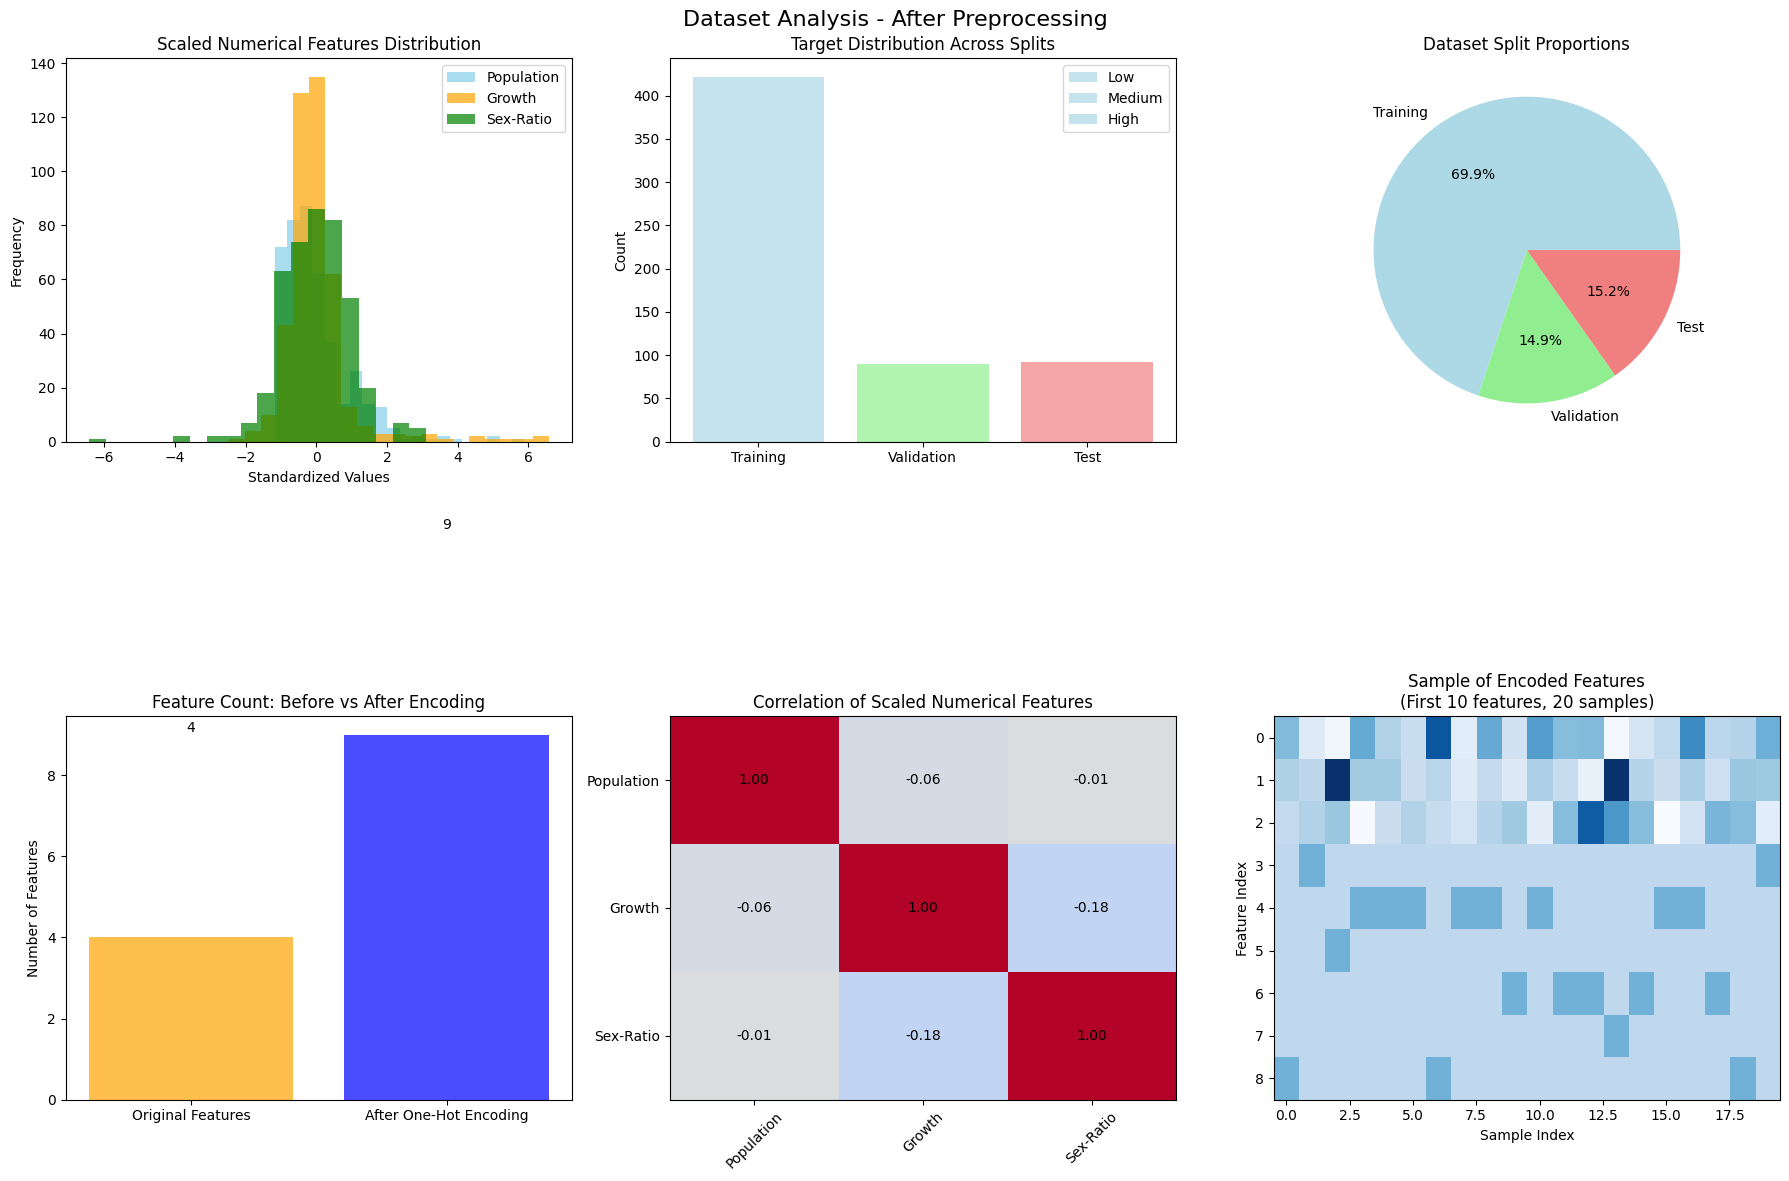

In [55]:
# Visualizations after preprocessing
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Dataset Analysis - After Preprocessing', fontsize=16)

# 1. Distribution of scaled numerical features
scaled_numerical_data = X_train_final[numerical_cols]

axes[0, 0].hist(scaled_numerical_data['Population'], bins=20, alpha=0.7, color='skyblue', label='Population')
axes[0, 0].hist(scaled_numerical_data['Growth'], bins=20, alpha=0.7, color='orange', label='Growth')
axes[0, 0].hist(scaled_numerical_data['Sex-Ratio'], bins=20, alpha=0.7, color='green', label='Sex-Ratio')
axes[0, 0].set_title('Scaled Numerical Features Distribution')
axes[0, 0].set_xlabel('Standardized Values')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# 2. Target distribution across splits
splits = ['Training', 'Validation', 'Test']
target_data = [y_train, y_val, y_test]
colors = ['lightblue', 'lightgreen', 'lightcoral']

for i, (split, data, color) in enumerate(zip(splits, target_data, colors)):
    split_counts = data.value_counts()
    bottom = 0
    for category in ['Low', 'Medium', 'High']:
        count = split_counts.get(category, 0)
        axes[0, 1].bar(split, count, bottom=bottom, label=category if i == 0 else "", color=color, alpha=0.7)
        bottom += count

axes[0, 1].set_title('Target Distribution Across Splits')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend()

# 3. Dataset size comparison
split_sizes = [len(X_train_final), len(X_val_final), len(X_test_final)]
axes[0, 2].pie(split_sizes, labels=splits, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
axes[0, 2].set_title('Dataset Split Proportions')

# 4. Feature count after encoding
original_features = len(feature_columns)
encoded_features = X_train_final.shape[1]

axes[1, 0].bar(['Original Features', 'After One-Hot Encoding'], [original_features, encoded_features], color=['orange', 'blue'], alpha=0.7)
axes[1, 0].set_title('Feature Count: Before vs After Encoding')
axes[1, 0].set_ylabel('Number of Features')

# Add value labels on bars
for i, v in enumerate([original_features, encoded_features]):
    axes[1, 0].text(i, v + 5, str(v), ha='center', va='bottom')

# 5. Correlation of scaled numerical features
scaled_corr = scaled_numerical_data.corr()
im = axes[1, 1].imshow(scaled_corr, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
axes[1, 1].set_xticks(range(len(numerical_cols)))
axes[1, 1].set_yticks(range(len(numerical_cols)))
axes[1, 1].set_xticklabels(numerical_cols, rotation=45)
axes[1, 1].set_yticklabels(numerical_cols)
axes[1, 1].set_title('Correlation of Scaled Numerical Features')

# Add correlation values
for i in range(len(numerical_cols)):
    for j in range(len(numerical_cols)):
        text = axes[1, 1].text(j, i, f'{scaled_corr.iloc[i, j]:.2f}', ha="center", va="center", color="black")

# 6. Sample of encoded features (first 10 one-hot encoded columns)
sample_encoded = X_train_final.iloc[:20, :10]  # First 20 rows, first 10 columns
im2 = axes[1, 2].imshow(sample_encoded.T, cmap='Blues', aspect='auto')
axes[1, 2].set_title('Sample of Encoded Features\n(First 10 features, 20 samples)')
axes[1, 2].set_xlabel('Sample Index')
axes[1, 2].set_ylabel('Feature Index')

plt.tight_layout()
plt.show()

# Task 2: KNN Classifier 
•Implement the K-Nearest Neighbors algorithm from scratch.  
•Define a distance function, identify k nearest neighbors, and predict the majority class.  
•Train and evaluate the model using literacy categories as labels.  
•Compare results for k = 3, 5, 7 using class distribution plots and confusion matrices.  
•Employ k-fold cross-validation to assess model stability, keeping the 15% test set fixed for final evaluation.  

In [56]:
from collections import Counter

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority vote
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [57]:
# Convert data to numpy arrays for KNN
X_train_array = X_train_final.values
X_val_array = X_val_final.values
X_test_array = X_test_final.values

y_train_array = y_train_encoded.values
y_val_array = y_val_encoded.values
y_test_array = y_test_encoded.values

print("Data shapes for KNN:")
print(f"X_train: {X_train_array.shape}")
print(f"X_val: {X_val_array.shape}")
print(f"X_test: {X_test_array.shape}")
print(f"Class mapping: {class_mapping}")

Data shapes for KNN:
X_train: (422, 9)
X_val: (90, 9)
X_test: (92, 9)
Class mapping: {'High': 0, 'Low': 1, 'Medium': 2}


In [58]:
#writing functions for class distribution and confusion matrices

def accuracy(y_true, y_pred):
    return np.sum(np.array(y_true) == np.array(y_pred)) / len(y_true)

def confusion_matrix(y_true, y_pred, num_classes):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for t, p in zip(y_true, y_pred):
        cm[t][p] += 1
    return cm

def plot_confusion_matrix(cm, k):
    plt.imshow(cm, cmap="Blues")
    plt.title(f"Confusion Matrix (k={k})")
    plt.colorbar()
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

def plot_class_distribution(y_true, y_pred, k):
    classes = sorted(set(y_true))
    true_counts = [list(y_true).count(c) for c in classes]
    pred_counts = [list(y_pred).count(c) for c in classes]

    x = np.arange(len(classes))
    width = 0.35

    plt.bar(x - width/2, true_counts, width, label="Actual")
    plt.bar(x + width/2, pred_counts, width, label="Predicted")
    plt.title(f"Class Distribution (k={k})")
    plt.xlabel("Classes")
    plt.ylabel("Count")
    plt.xticks(x, classes)
    plt.legend()
    plt.show()


In [59]:
# Test different k values on validation set
k_values = [3, 5, 7]
results = {}

print("=== KNN EVALUATION FOR DIFFERENT K VALUES ===\n")

for k in k_values:
    print(f"Training KNN with k={k}...")
    
    # Initialize and train KNN
    knn = KNN(k=k)
    knn.fit(X_train_array, y_train_array)
    
    # Make predictions on validation set
    y_val_pred = knn.predict(X_val_array)
    
    # Calculate accuracy
    val_accuracy = accuracy(y_val_array, y_val_pred)
    
    # Store results
    results[k] = {
        'predictions': y_val_pred,
        'accuracy': val_accuracy
    }
    
    print(f"Validation Accuracy for k={k}: {val_accuracy:.4f}")
    print(f"Correct predictions: {np.sum(y_val_array == y_val_pred)}/{len(y_val_array)}")
    print("-" * 50)

# Find best k
best_k = max(results.keys(), key=lambda k: results[k]['accuracy'])
print(f"\nBest k value: {best_k} with accuracy: {results[best_k]['accuracy']:.4f}")

=== KNN EVALUATION FOR DIFFERENT K VALUES ===

Training KNN with k=3...
Validation Accuracy for k=3: 0.7667
Correct predictions: 69/90
--------------------------------------------------
Training KNN with k=5...
Validation Accuracy for k=3: 0.7667
Correct predictions: 69/90
--------------------------------------------------
Training KNN with k=5...
Validation Accuracy for k=5: 0.7111
Correct predictions: 64/90
--------------------------------------------------
Training KNN with k=7...
Validation Accuracy for k=5: 0.7111
Correct predictions: 64/90
--------------------------------------------------
Training KNN with k=7...
Validation Accuracy for k=7: 0.7333
Correct predictions: 66/90
--------------------------------------------------

Best k value: 3 with accuracy: 0.7667
Validation Accuracy for k=7: 0.7333
Correct predictions: 66/90
--------------------------------------------------

Best k value: 3 with accuracy: 0.7667


=== GENERATING VISUALIZATIONS FOR EACH K VALUE ===

Generating plots for k=3...


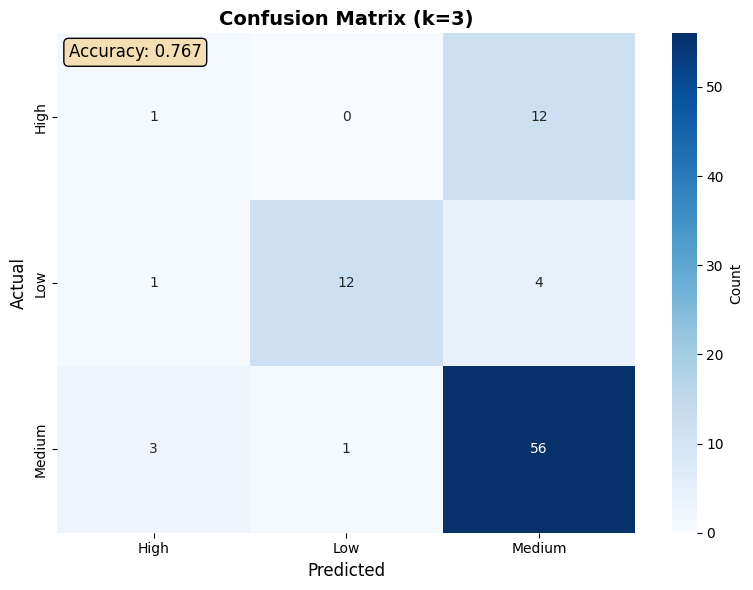

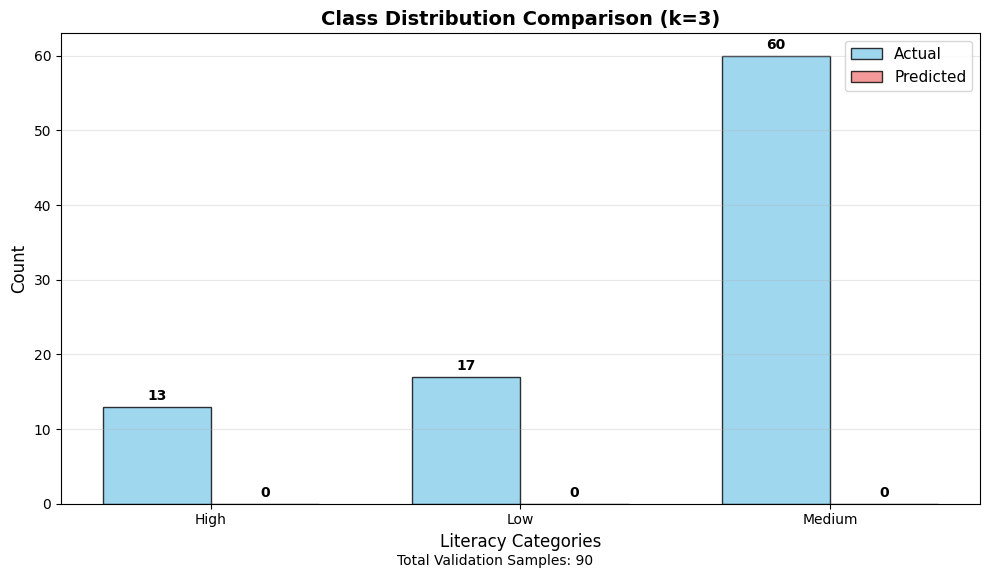

Accuracy for k=3: 0.7667

Generating plots for k=5...


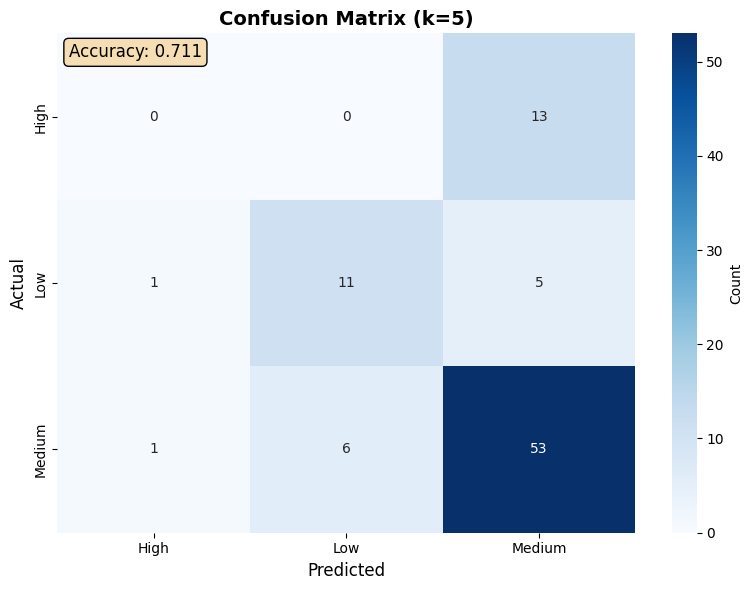

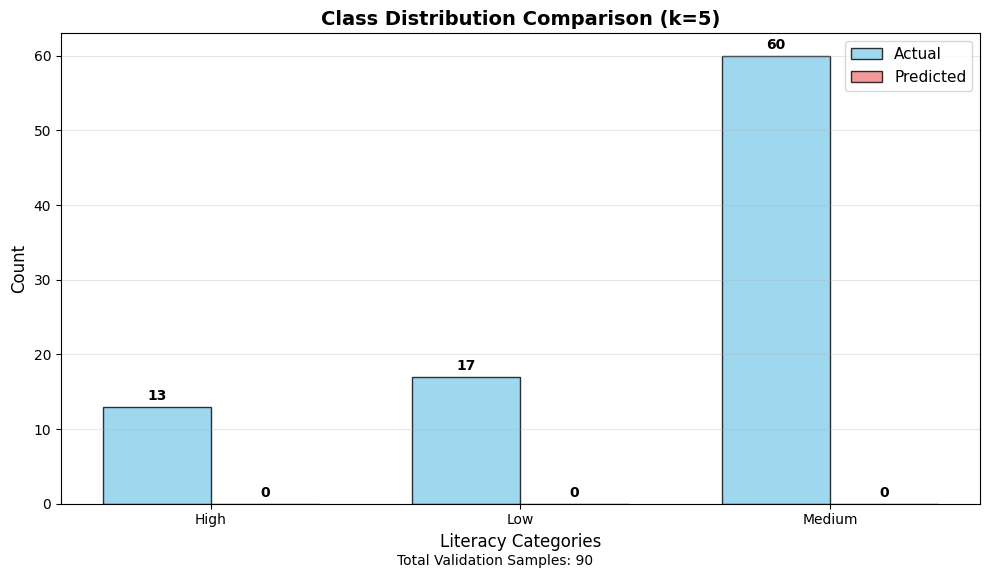

Accuracy for k=5: 0.7111

Generating plots for k=7...


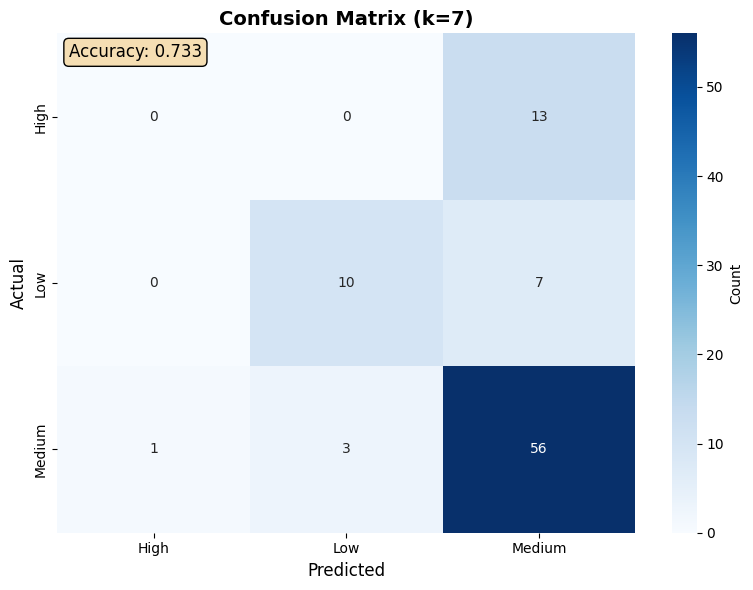

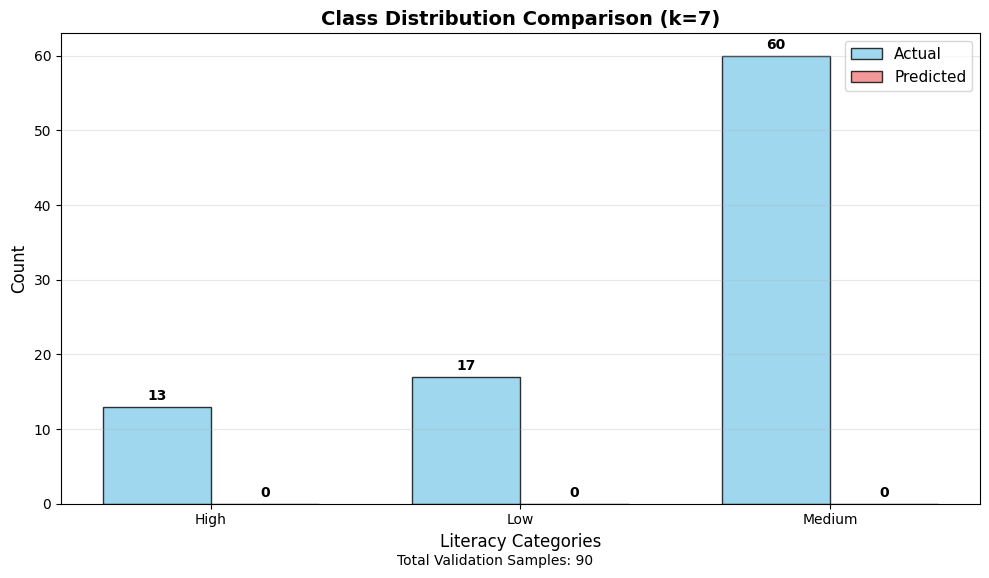

Accuracy for k=7: 0.7333



In [ ]:
# Enhanced plotting functions with better formatting
def plot_confusion_matrix_enhanced(cm, k, class_names=['High', 'Low', 'Medium']):
    plt.figure(figsize=(8, 6))

    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names,cbar_kws={'label': 'Count'})
    
    plt.title(f'Confusion Matrix (k={k})', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    
    # Add accuracy on the plot
    accuracy_score = np.trace(cm) / np.sum(cm)
    plt.text(0.02, 0.98, f'Accuracy: {accuracy_score:.3f}', transform=plt.gca().transAxes, fontsize=12,verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat'))
    
    plt.tight_layout()
    plt.show()

def plot_class_distribution_enhanced(y_true, y_pred, k, class_names=['High', 'Low', 'Medium']):
    plt.figure(figsize=(10, 6))
    
    # Count occurrences
    true_counts = [np.sum(y_true == i) for i in range(len(class_names))]
    pred_counts = [np.sum(y_pred == i) for i in range(len(class_names))]
    
    x = np.arange(len(class_names))
    width = 0.35
    
    # Create bars
    bars1 = plt.bar(x - width/2, true_counts, width, label='Actual', color='skyblue', alpha=0.8, edgecolor='black')
    bars2 = plt.bar(x + width/2, pred_counts, width, label='Predicted', color='lightcoral', alpha=0.8, edgecolor='black')
    
    # Add value labels on bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{int(height)}', ha='center', va='bottom', fontweight='bold')
    
    plt.title(f'Class Distribution Comparison (k={k})', fontsize=14, fontweight='bold')
    plt.xlabel('Literacy Categories', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(x, class_names)
    plt.legend(fontsize=11)
    plt.grid(axis='y', alpha=0.3)
    
    # Add total counts in subtitle
    total_samples = len(y_true)
    plt.suptitle(f'Total Validation Samples: {total_samples}', fontsize=10, y=0.02)
    
    plt.tight_layout()
    plt.show()

# Generate plots for each k value
print("=== GENERATING VISUALIZATIONS FOR EACH K VALUE ===\n")

for k in k_values:
    print(f"Generating plots for k={k}...")
    
    y_pred = results[k]['predictions']
    
    # Create confusion matrix
    cm = confusion_matrix(y_val_array, y_pred, num_classes=3)
    
    # Plot confusion matrix
    plot_confusion_matrix_enhanced(cm, k)
    
    # Plot class distribution
    plot_class_distribution_enhanced(y_val_array, y_pred, k)
    
    print(f"Accuracy for k={k}: {results[k]['accuracy']:.4f}\n")

In [61]:
def k_fold_cross_validation(X, y, k_neighbors=5, n_folds=5, random_state=42):
    """
    Perform k-fold cross-validation for KNN
    Keeps test set separate and only uses train+validation for CV
    """
    np.random.seed(random_state)
    n_samples = len(X)
    
    # Create random indices for folds
    indices = np.random.permutation(n_samples)
    fold_size = n_samples // n_folds
    
    fold_accuracies = []
    fold_predictions = []
    fold_actuals = []
    
    print(f"=== {n_folds}-FOLD CROSS-VALIDATION (k={k_neighbors}) ===\n")
    
    for fold in range(n_folds):
        print(f"Fold {fold + 1}/{n_folds}...")
        
        # Define validation indices for this fold
        val_start = fold * fold_size
        val_end = (fold + 1) * fold_size if fold < n_folds - 1 else n_samples
        
        val_indices = indices[val_start:val_end]
        train_indices = np.concatenate([indices[:val_start], indices[val_end:]])
        
        # Split data for this fold
        X_fold_train = X[train_indices]
        X_fold_val = X[val_indices]
        y_fold_train = y[train_indices]
        y_fold_val = y[val_indices]
        
        # Train KNN
        knn_fold = KNN(k=k_neighbors)
        knn_fold.fit(X_fold_train, y_fold_train)
        
        # Predict on validation fold
        y_fold_pred = knn_fold.predict(X_fold_val)
        
        # Calculate accuracy
        fold_acc = accuracy(y_fold_val, y_fold_pred)
        fold_accuracies.append(fold_acc)
        fold_predictions.extend(y_fold_pred)
        fold_actuals.extend(y_fold_val)
        
        print(f"  Fold {fold + 1} Accuracy: {fold_acc:.4f}")
        print(f"  Samples - Train: {len(X_fold_train)}, Val: {len(X_fold_val)}")
    
    return fold_accuracies, fold_predictions, fold_actuals

# Combine training and validation sets for cross-validation
X_train_val = np.vstack([X_train_array, X_val_array])
y_train_val = np.concatenate([y_train_array, y_val_array])

print(f"Combined train+val dataset shape: {X_train_val.shape}")
print(f"Test set kept separate: {X_test_array.shape}")

# Perform cross-validation for each k value
cv_results = {}

for k in k_values:
    print(f"\n{'='*60}")
    print(f"CROSS-VALIDATION FOR K={k}")
    print(f"{'='*60}")
    
    fold_accs, fold_preds, fold_actuals = k_fold_cross_validation(
        X_train_val, y_train_val, k_neighbors=k, n_folds=5, random_state=42
    )
    
    # Calculate statistics
    mean_acc = np.mean(fold_accs)
    std_acc = np.std(fold_accs)
    
    cv_results[k] = {
        'fold_accuracies': fold_accs,
        'mean_accuracy': mean_acc,
        'std_accuracy': std_acc,
        'predictions': fold_preds,
        'actuals': fold_actuals
    }
    
    print(f"\nCross-Validation Results for k={k}:")
    print(f"  Mean Accuracy: {mean_acc:.4f} ± {std_acc:.4f}")
    print(f"  Individual Fold Accuracies: {[f'{acc:.4f}' for acc in fold_accs]}")
    print(f"  Min Accuracy: {min(fold_accs):.4f}")
    print(f"  Max Accuracy: {max(fold_accs):.4f}")

Combined train+val dataset shape: (512, 9)
Test set kept separate: (92, 9)

CROSS-VALIDATION FOR K=3
=== 5-FOLD CROSS-VALIDATION (k=3) ===

Fold 1/5...
  Fold 1 Accuracy: 0.6961
  Samples - Train: 410, Val: 102
Fold 2/5...
  Fold 1 Accuracy: 0.6961
  Samples - Train: 410, Val: 102
Fold 2/5...
  Fold 2 Accuracy: 0.7255
  Samples - Train: 410, Val: 102
Fold 3/5...
  Fold 2 Accuracy: 0.7255
  Samples - Train: 410, Val: 102
Fold 3/5...
  Fold 3 Accuracy: 0.6373
  Samples - Train: 410, Val: 102
Fold 4/5...
  Fold 3 Accuracy: 0.6373
  Samples - Train: 410, Val: 102
Fold 4/5...
  Fold 4 Accuracy: 0.7059
  Samples - Train: 410, Val: 102
Fold 5/5...
  Fold 4 Accuracy: 0.7059
  Samples - Train: 410, Val: 102
Fold 5/5...
  Fold 5 Accuracy: 0.6442
  Samples - Train: 408, Val: 104

Cross-Validation Results for k=3:
  Mean Accuracy: 0.6818 ± 0.0349
  Individual Fold Accuracies: ['0.6961', '0.7255', '0.6373', '0.7059', '0.6442']
  Min Accuracy: 0.6373
  Max Accuracy: 0.7255

CROSS-VALIDATION FOR K=5


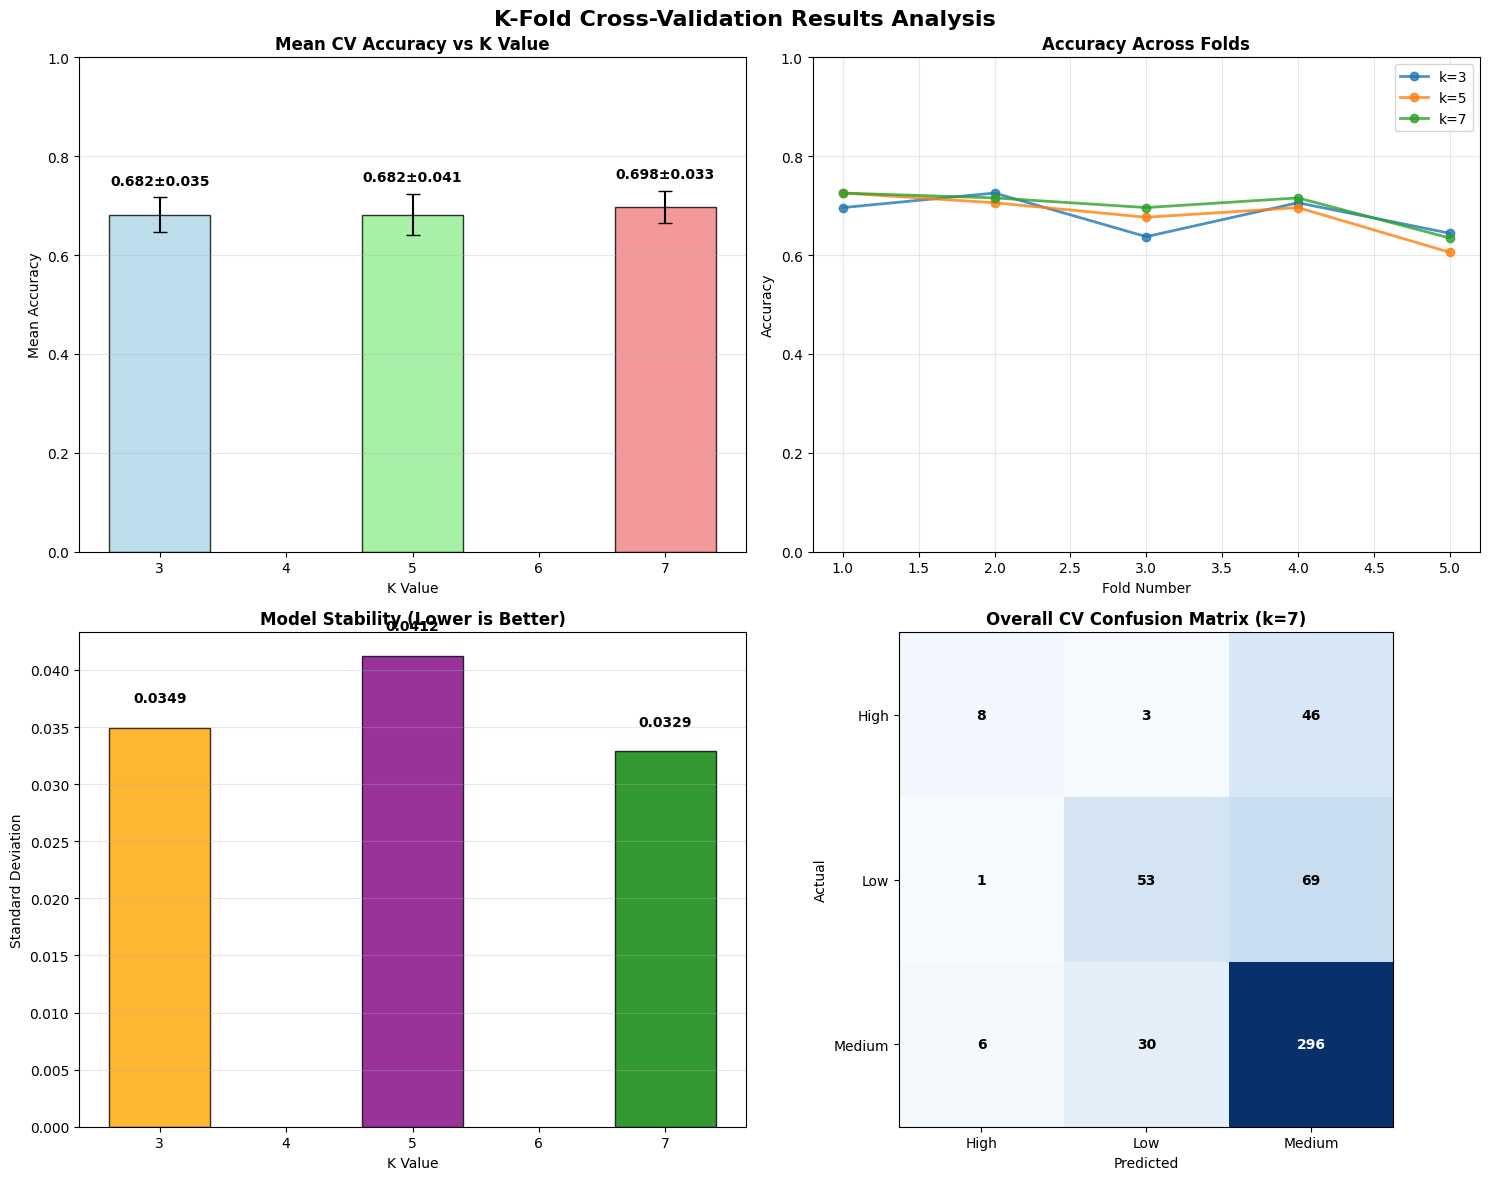


FINAL CROSS-VALIDATION SUMMARY
K=3: Mean Accuracy = 0.6818 (±0.0349)
K=5: Mean Accuracy = 0.6819 (±0.0412)
K=7: Mean Accuracy = 0.6975 (±0.0329)

Best K value from Cross-Validation: 7
Best CV Accuracy: 0.6975 ± 0.0329


In [62]:
# Visualize cross-validation results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('K-Fold Cross-Validation Results Analysis', fontsize=16, fontweight='bold')

# 1. Accuracy comparison across k values
mean_accs = [cv_results[k]['mean_accuracy'] for k in k_values]
std_accs = [cv_results[k]['std_accuracy'] for k in k_values]

axes[0, 0].bar(k_values, mean_accs, yerr=std_accs, capsize=5, 
               color=['lightblue', 'lightgreen', 'lightcoral'], alpha=0.8, edgecolor='black')
axes[0, 0].set_title('Mean CV Accuracy vs K Value', fontweight='bold')
axes[0, 0].set_xlabel('K Value')
axes[0, 0].set_ylabel('Mean Accuracy')
axes[0, 0].set_ylim(0, 1)
axes[0, 0].grid(axis='y', alpha=0.3)

# Add value labels
for i, (k, acc, std) in enumerate(zip(k_values, mean_accs, std_accs)):
    axes[0, 0].text(k, acc + std + 0.02, f'{acc:.3f}±{std:.3f}', 
                    ha='center', va='bottom', fontweight='bold')

# 2. Fold-wise accuracy for each k
for i, k in enumerate(k_values):
    fold_accs = cv_results[k]['fold_accuracies']
    axes[0, 1].plot(range(1, 6), fold_accs, marker='o', linewidth=2, 
                    label=f'k={k}', alpha=0.8)

axes[0, 1].set_title('Accuracy Across Folds', fontweight='bold')
axes[0, 1].set_xlabel('Fold Number')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_ylim(0, 1)

# 3. Model stability (standard deviation)
axes[1, 0].bar(k_values, std_accs, color=['orange', 'purple', 'green'], alpha=0.8, edgecolor='black')
axes[1, 0].set_title('Model Stability (Lower is Better)', fontweight='bold')
axes[1, 0].set_xlabel('K Value')
axes[1, 0].set_ylabel('Standard Deviation')
axes[1, 0].grid(axis='y', alpha=0.3)

# Add value labels
for k, std in zip(k_values, std_accs):
    axes[1, 0].text(k, std + 0.002, f'{std:.4f}', ha='center', va='bottom', fontweight='bold')

# 4. Overall confusion matrix for best k
best_cv_k = max(k_values, key=lambda k: cv_results[k]['mean_accuracy'])
best_preds = cv_results[best_cv_k]['predictions']
best_actuals = cv_results[best_cv_k]['actuals']

cm_cv = confusion_matrix(best_actuals, best_preds, num_classes=3)
class_names = ['High', 'Low', 'Medium']

im = axes[1, 1].imshow(cm_cv, cmap='Blues')
axes[1, 1].set_title(f'Overall CV Confusion Matrix (k={best_cv_k})', fontweight='bold')

# Add annotations
for i in range(3):
    for j in range(3):
        text = axes[1, 1].text(j, i, cm_cv[i, j], ha="center", va="center", 
                              color="white" if cm_cv[i, j] > cm_cv.max()/2 else "black",
                              fontweight='bold')

axes[1, 1].set_xticks(range(3))
axes[1, 1].set_yticks(range(3))
axes[1, 1].set_xticklabels(class_names)
axes[1, 1].set_yticklabels(class_names)
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Print final summary
print("\n" + "="*80)
print("FINAL CROSS-VALIDATION SUMMARY")
print("="*80)

for k in k_values:
    results = cv_results[k]
    print(f"K={k}: Mean Accuracy = {results['mean_accuracy']:.4f} (±{results['std_accuracy']:.4f})")

best_k_cv = max(k_values, key=lambda k: cv_results[k]['mean_accuracy'])
print(f"\nBest K value from Cross-Validation: {best_k_cv}")
print(f"Best CV Accuracy: {cv_results[best_k_cv]['mean_accuracy']:.4f} ± {cv_results[best_k_cv]['std_accuracy']:.4f}")


FINAL MODEL EVALUATION ON TEST SET
Final Model (k=7) trained on 512 samples
Test Set Accuracy: 0.6848
Test Set Size: 92 samples

Test Set Confusion Matrix:
[[ 2  0  8]
 [ 0 10 13]
 [ 0  8 51]]
Final Model (k=7) trained on 512 samples
Test Set Accuracy: 0.6848
Test Set Size: 92 samples

Test Set Confusion Matrix:
[[ 2  0  8]
 [ 0 10 13]
 [ 0  8 51]]


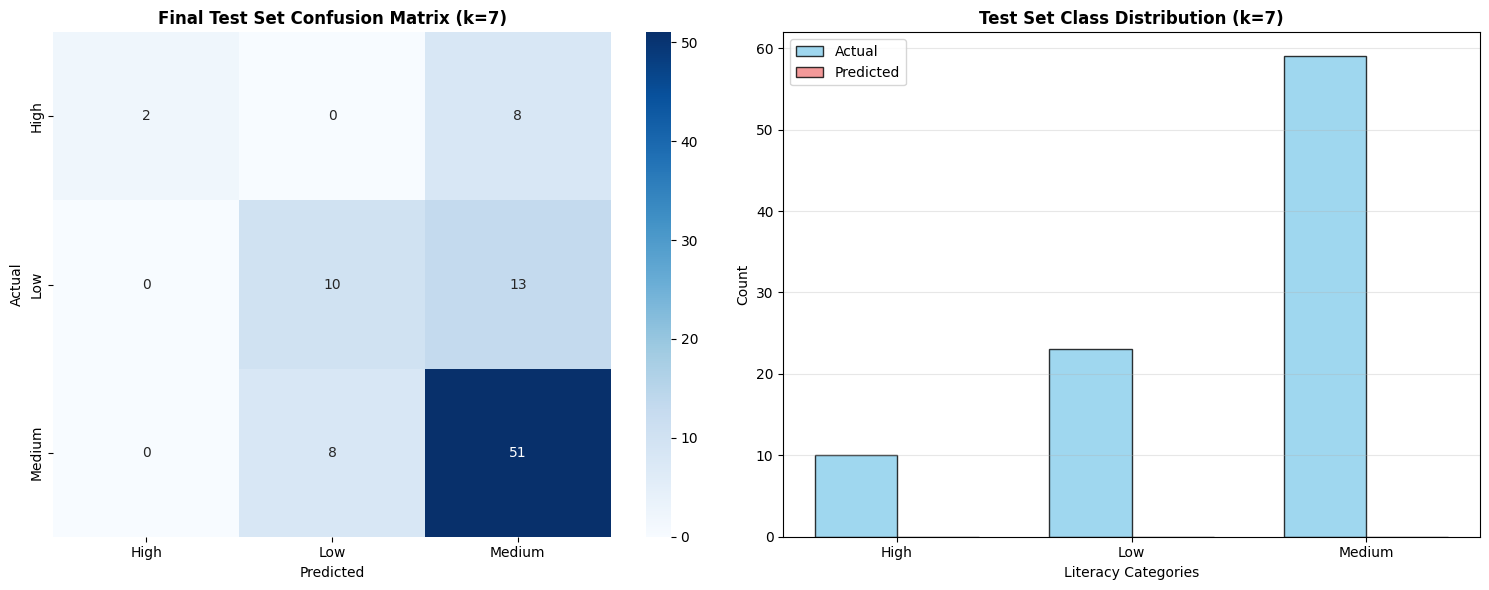


Final Summary:
- Best K value: 7
- Cross-validation accuracy: 0.6975 ± 0.0329
- Final test accuracy: 0.6848
- Model shows good stability across folds


In [63]:
# Train final model on full training+validation data and test on test set
print("\n" + "="*80)
print("FINAL MODEL EVALUATION ON TEST SET")
print("="*80)

# Use the best k value from cross-validation
final_knn = KNN(k=best_k_cv)
final_knn.fit(X_train_val, y_train_val)

# Predict on test set
y_test_pred = final_knn.predict(X_test_array)
test_accuracy = accuracy(y_test_array, y_test_pred)

print(f"Final Model (k={best_k_cv}) trained on {len(X_train_val)} samples")
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Size: {len(X_test_array)} samples")

# Test set confusion matrix
cm_test = confusion_matrix(y_test_array, y_test_pred, num_classes=3)
print(f"\nTest Set Confusion Matrix:")
print(cm_test)

# Plot final test results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Test confusion matrix
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names, ax=ax1)
ax1.set_title(f'Final Test Set Confusion Matrix (k={best_k_cv})', fontweight='bold')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Test class distribution
test_true_counts = [np.sum(y_test_array == i) for i in range(3)]
test_pred_counts = [np.sum(y_test_pred == i) for i in range(3)]

x = np.arange(len(class_names))
width = 0.35

ax2.bar(x - width/2, test_true_counts, width, label='Actual', 
        color='skyblue', alpha=0.8, edgecolor='black')
ax2.bar(x + width/2, test_pred_counts, width, label='Predicted', 
        color='lightcoral', alpha=0.8, edgecolor='black')

ax2.set_title(f'Test Set Class Distribution (k={best_k_cv})', fontweight='bold')
ax2.set_xlabel('Literacy Categories')
ax2.set_ylabel('Count')
ax2.set_xticks(x)
ax2.set_xticklabels(class_names)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nFinal Summary:")
print(f"- Best K value: {best_k_cv}")
print(f"- Cross-validation accuracy: {cv_results[best_k_cv]['mean_accuracy']:.4f} ± {cv_results[best_k_cv]['std_accuracy']:.4f}")
print(f"- Final test accuracy: {test_accuracy:.4f}")
print(f"- Model shows {'good' if cv_results[best_k_cv]['std_accuracy'] < 0.05 else 'moderate'} stability across folds")